420-A52-SF - Algorithmes d'apprentissage supervisé - Hiver 2020 - Spécialisation technique en Intelligence Artificielle - Joel BASSA.
<br/>
![Correction Projet #1](static/projet1-banner.png)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## 0 - Chargement des bibliothèques

In [126]:
# Manipulation de données
import numpy as np
import pandas as pd

# Visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns

# Helpers
#from helpers import polynomial

# Outils divers
import time
from collections import defaultdict

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.utils.fixes import loguniform
from sklearn.metrics import roc_auc_score
from helpers import plot_roc_curve
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

## 1 - Chargement du jeu de données et exploration sommaire

<strong>Lecture du fichier `AUS_train.csv`<strong/>

In [3]:
AUS = pd.read_csv('AUS_train.csv', index_col=[0])

<strong>Affichage des dix premières lignes de la trame de données AUS</strong>

In [4]:
AUS.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,4.8,8.5,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,4.8,8.5,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,5.0,18.1,24.6,No,No


<strong>Affichage du nombre d'observations</strong>

In [5]:
AUS.shape

(99536, 23)

#### Affichage du nom des variables indicatrices

In [6]:
AUS.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

| Variable        | Description           | Type  |
| --------------- |:--------------------- |:----- |
| Date      | Date d'un jour de l'année | qualitative |
| Location      | Ville de l'australie      |   qualitative |
| MinTemp | Température minimale en dégré    |  quantitative |
| MaxTemp | Température maximale en dégré | quantitative |
| Rainfall| Preciptations | quantitative | 
| Evaporation | Evaporation de l'eau de pluie| quantitative |
| Sunshine| dégré d'ensoleillement| quantitative |
| WindGustDir | Direction rafale de vent| qualitative |
| WindGustSpeed | Vitesse rafale de vent (en mph)| quantitative |
| WindDir9am | Direction du vent à 9h du matin | qualitative |
| WindDir3pm | Direction du vent à 3h après-midi | qualitative |
| WindSpeed9am | Vitesse du vent (en mph) à 9h du matin  |   quantitative |
| WindSpeed3pm | Vitesse du vent (en mph) à 3h après-midi  | quantitative |
| Humidity9am | Humidité relative à 9h du matin   | quantitative |
| Humidity3pm | Humidité relative à 3h après-midi  | quantitative |
| Pressure9am | Pression atmosohérique à 9h du matin  (en hPa)| quantitative |
| Pressure3pm | Pression atmosohérique à 3h après-midi  | quantitative |
| Cloud9am | Taille des nuages (en km) à 9h du matin   | quantitative |
| Cloud3pm | Taille des nuages (en km) à 3h après-midi  | quantitative |
| Temp9am | Température à 9h du matin | quantitative |
| Temp3pm | Température à 3h après-midi | quantitative |
| RainToday |  indicatrice de la présence de pluie à la date indiquée (Yes s'il y a pluie, No sinon) | qualitative |
| RainTomorrow|  indicatrice de la présence de pluie le lendemain de la date indiquée (Yes s'il y a pluie, No sinon) | qualitative |

#### Vérifions le balancement des classes

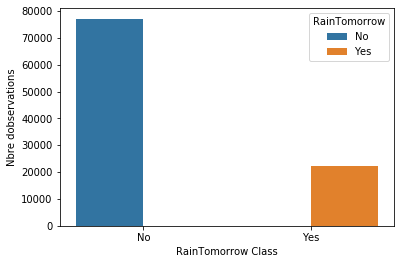

In [7]:
sns.countplot(x='RainTomorrow', hue='RainTomorrow', data=AUS)
plt.xlabel('RainTomorrow Class')
plt.ylabel('Nbre d''observations')
plt.show()

On remarque qu'il y'a un débalancement leger des classes. Nous verrons par la suite en fonction des résultats de prédictions s'il y a eu de l'addresser.

## 2 - Modèle de référence

Nous allons prédire la classe la plus fréquente.

In [8]:
from sklearn.dummy import DummyClassifier

In [9]:
y = (AUS['RainTomorrow'] == "Yes").astype(int)

In [10]:
baseline_clf = DummyClassifier(strategy='most_frequent') 
baseline_clf.fit(AUS.values, y)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
y_pred_train = baseline_clf.predict(AUS)
acc_baseline = accuracy_score(y_pred_train, y)
print(f'Performance du modèle de référence (dummy): {100*acc_baseline}%')

Performance du modèle de référence (dummy): 77.53677061565665%


Ce modèle simpliste permet de prédire à 77.53% qu'il pleuvra demain. Nous allons tenter d'améliorer cette performance en selectionnant les variables au fur et à mesure.

## 3 - Entraînement d'un classificateur (régression logistique)

Nous allons maintenant inclure de nouvelles variables dans le modèle. Bien sûr, n'oublions pas d'ajouter celle qui semble la plus significative, `RainToday`

In [13]:
df = pd.DataFrame()

## RainToday

`RainToday` est une variable catégorique booléene qu'il faudra convertir en numérique

In [14]:
AUS['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
AUS['RainToday'].isnull().values.any()

False

In [16]:
df['RainToday'] = (AUS['RainToday'] == "Yes").astype(int)

## Temp3pm,Temp9am,Cloud3pm,Cloud9am,Pressure3pm ,Pressure9m,Humidity3pm,Humidity9m,WindSpeed3pm,WindSpeed9am, WindGustSpeed,Sunshine,Evaporation,Rainfall,MaxTemp,MinTemp

Toutes ces variables quantitatives sont significatives. Intégrons les donc dans notre modèle

In [17]:
df['Temp3pm'] = AUS['Temp3pm']
df['Temp9am'] = AUS['Temp9am']
df['Cloud3pm'] = AUS['Cloud3pm']
df['Cloud9am'] = AUS['Cloud9am']
df['Pressure3pm'] = AUS['Pressure3pm']
df['Pressure9am'] = AUS['Pressure9am']
df['Humidity3pm'] = AUS['Humidity3pm']
df['Humidity9am'] = AUS['Humidity9am']
df['WindSpeed3pm'] = AUS['WindSpeed3pm']
df['WindGustSpeed'] = AUS['WindGustSpeed']
df['Sunshine'] = AUS['Sunshine']
df['Evaporation'] = AUS['Evaporation']
df['Rainfall'] = AUS['Rainfall']
df['MaxTemp'] = AUS['MaxTemp']
df['MinTemp'] = AUS['MinTemp']

In [18]:
AUS['RainToday'].isnull().values.any()

False

In [19]:
logreg = LogisticRegression(penalty="none", fit_intercept=True, max_iter=1000).fit(df, y)

In [20]:
accuracy_score(logreg.predict(df), y) * 100

84.08615978138563

## Location

Etant donné que le problème à résourdre est de predire s'il pleuvra demain en **Australie**, considerer une ville spécifique importe peu. Par conséquent cette variable peut etre ignorée.

In [21]:
AUS['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

## WindGustDir,WindDir9am,WindDir3pm

In [22]:
AUS['WindGustDir'].unique()

array(['W', 'WSW', 'NE', 'WNW', 'N', 'NNE', 'SW', 'ENE', 'SSE', 'S',
       'NNW', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [23]:
AUS['WindDir9am'].unique()

array(['W', 'SE', 'SW', 'SSE', 'S', 'NE', 'NNW', 'SSW', 'N', 'WSW', 'NW',
       'WNW', 'ENE', 'NNE', 'ESE', 'E'], dtype=object)

In [24]:
AUS['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW', 'SW',
       'SE', 'N', 'NW', 'NNE', 'NE', 'S'], dtype=object)

Toutes ces variables quantitatives ne seront pas prises en compte dans notre modèle,car nous avons leur équivalent  matérialisant la vitesse du vent.

## Date

Nous pouvons ignorer la date du jour puisqu'elle ne donne aucune informnation utile. La variable `RainToday` est largement suffisante. 

Sauveagarde de notre meilleur modèle à date.

In [25]:
lr_best = logreg

#### Aire sous la courbe

In [26]:
y_train_pred_proba_logreg_base = lr_best.predict_proba(df)[:,1]
print(f'AUC = {roc_auc_score(y, y_train_pred_proba_logreg_base)}')

AUC = 0.8579769956064509


#### Courbe ROC

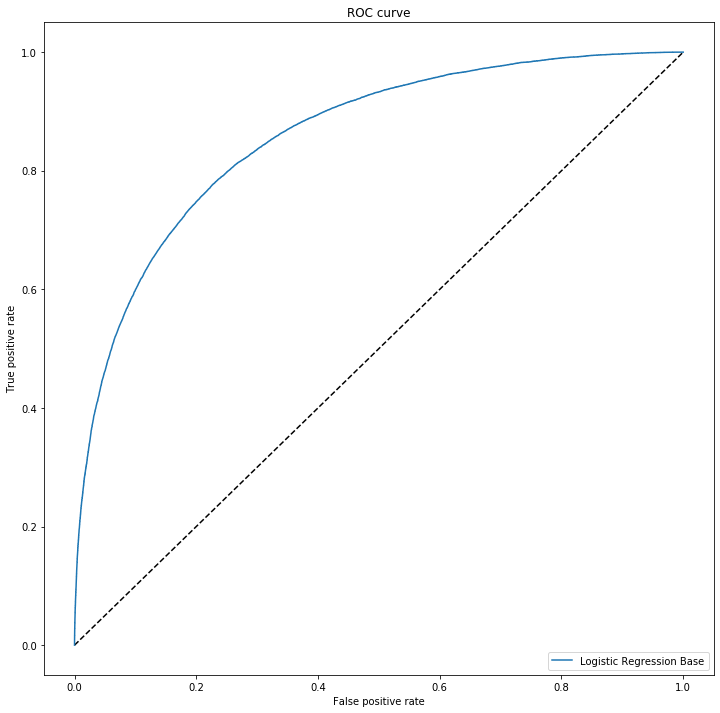

In [27]:
results = {}
results['Logistic Regression Base'] = y_train_pred_proba_logreg_base
plot_roc_curve(results, y)

## 4 - Recherche aléatoire (Regression Logistique / Arbre de décision / Gradient Boosting

Etant donné que notre jeu de données est large `99536 observations`, nous entrainerons un ensemble d'algorithmes sur un sous-ensemble (`5%`), afin de selectionner le plus performant. Ensuite, nous pourrions augmenter graduellement nos données et entrainer uniquement ce algorithme sélectionné. 

In [28]:
#Fonction permettant de faire un subset avec un pourcentage défini.
def subset(dataframe,size):
    df_split = train_test_split(dataframe, train_size=size, shuffle=False)
    return df_split[0]

**Standardisation de notre dataset**

In [29]:
# Standardisation
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

### 5% du jeu de données (4976 observations)

In [30]:
X_train_5 = subset(df_scaled, 0.05)
y_train_5 = subset(y, 0.05)

In [31]:
X_train_5.shape

(4976, 16)

### 3-1 - Régression logistique avec recherche aléatoire

In [32]:
# Grid
parameters = {'C':[0.01, 0.1, 1, 10, 100],
              'l1_ratio':[0, 0.5, 1]}

distributions = dict(
    C=loguniform(0.5, 1e3),
    l1_ratio=loguniform(0.1, 1))

# Estimator
clf_logreg = LogisticRegression(penalty='elasticnet',
                                  max_iter=10000,
                                  solver='saga',
                                  random_state=2020)

# GridSearch avec Validation croisée
clf_logreg_rnd = RandomizedSearchCV(clf_logreg, distributions, cv=5, scoring="roc_auc", verbose=1, n_jobs=8)

In [33]:
clf_logreg_rnd.fit(X_train_5, y_train_5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:   10.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=10000,
                                                multi_class='auto', n_jobs=None,
                                                penalty='elasticnet',
                                                random_state=2020,
                                                solver='saga', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=8,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7facabfd3630>,
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7

In [34]:
print(f'Meilleurs paramètres: {clf_logreg_rnd.best_params_}')
print(f'Meilleur score (mean CV): {clf_logreg_rnd.best_score_}')

Meilleurs paramètres: {'C': 18.56669718980358, 'l1_ratio': 0.1547269488629726}
Meilleur score (mean CV): 0.8868971553123352


#### Aire sous la courbe

In [35]:
y_train_pred_proba_logreg_rscv = clf_logreg_rnd.best_estimator_.predict_proba(X_train_5)[:,1]
print(f'AUC = {roc_auc_score(y_train_5, y_train_pred_proba_logreg_rscv)}')

AUC = 0.8899384899616627


#### Courbe ROC

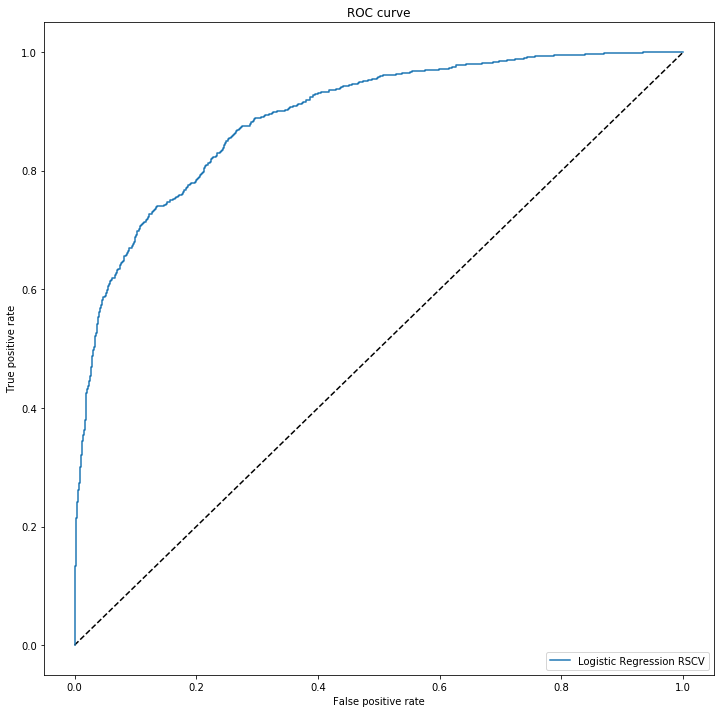

In [36]:
results = {}
results['Logistic Regression RSCV'] = y_train_pred_proba_logreg_rscv
plot_roc_curve(results, y_train_5)

### 3-2 - Arbres de décision

In [37]:
# Distributions des paramètres
distributions = dict(
    criterion=['gini', 'entropy'],
    ccp_alpha=loguniform(1e-3, 1e3),
    max_depth=randint(2, 128))

# Estimateur
clf_tree = DecisionTreeClassifier(random_state=2020)

    
# Recherche aléatoire avec avec validation croisée
clf_tree_rnd = RandomizedSearchCV(clf_tree, distributions, n_iter=100, cv=5, scoring="roc_auc", verbose=1, n_jobs=8, random_state=2020)

In [38]:
clf_tree_rnd.fit(X_train_5, y_train_5)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  54 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 354 tasks      | elapsed:   10.4s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:   14.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=2020,
          

In [39]:
print(f'Meilleurs paramètres: {clf_tree_rnd.best_params_}')
print(f'Meilleur score (mean CV): {clf_tree_rnd.best_score_}')

Meilleurs paramètres: {'ccp_alpha': 0.0019415783974619204, 'criterion': 'entropy', 'max_depth': 53}
Meilleur score (mean CV): 0.8474498250099778


#### Aire sous la courbe

In [40]:
y_train_pred_proba_tree = clf_tree_rnd.best_estimator_.predict_proba(X_train_5)[:,1]
print(f'AUC = {roc_auc_score(y_train_5, y_train_pred_proba_tree)}')

AUC = 0.8841048623722089


#### Courbe ROC

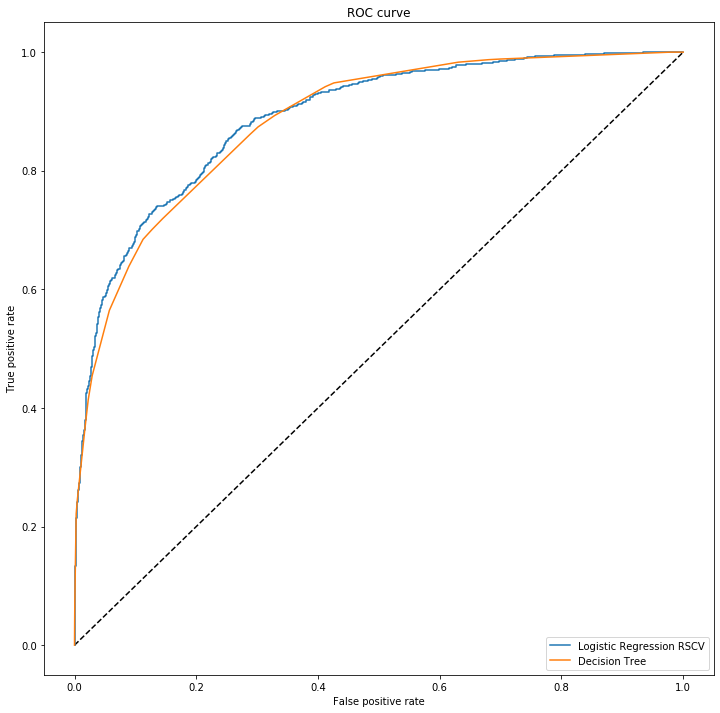

In [41]:
results['Decision Tree'] = y_train_pred_proba_tree
plot_roc_curve(results, y_train_5)

### 3-3 - Bagging

In [42]:
# Distributions des paramètres
distributions = dict(
    n_estimators=randint(2, 100))

# Estimateur
clf_bag = BaggingClassifier(base_estimator=clf_tree_rnd.best_estimator_, random_state=2020)

# Recherche aléatoire avec validation croisée
clf_bag_rnd = RandomizedSearchCV(clf_bag, distributions, n_iter=100, cv=5, scoring="roc_auc", verbose=1, n_jobs=8, random_state=2020)

In [43]:
clf_bag_rnd.fit(X_train_5, y_train_5)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   36.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  6.0min
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:  6.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0019415783974619204,
                                                                                     class_weight=None,
                                                                                     criterion='entropy',
                                                                                     max_depth=53,
                                                                                     max_features=None,
                                                                                     max_leaf_nodes=None,
                                                                                     min_impurity_decrease=0.0,
                                                                                     min_impurity_split=None,
                                                                                     min_samples_le

In [44]:
print(f'Meilleurs paramètres: {clf_bag_rnd.best_params_}')
print(f'Meilleur score (mean CV): {clf_bag_rnd.best_score_}')

Meilleurs paramètres: {'n_estimators': 77}
Meilleur score (mean CV): 0.8750826220096053


#### Aire sous la courbe

In [45]:
y_train_pred_proba_bag_5 = clf_bag_rnd.best_estimator_.predict_proba(X_train_5)[:,1]
print(f'AUC = {roc_auc_score(y_train_5, y_train_pred_proba_bag_5)}')

AUC = 0.958611037547081


In [46]:
best_model_gb = clf_bag_rnd

#### Courbe ROC

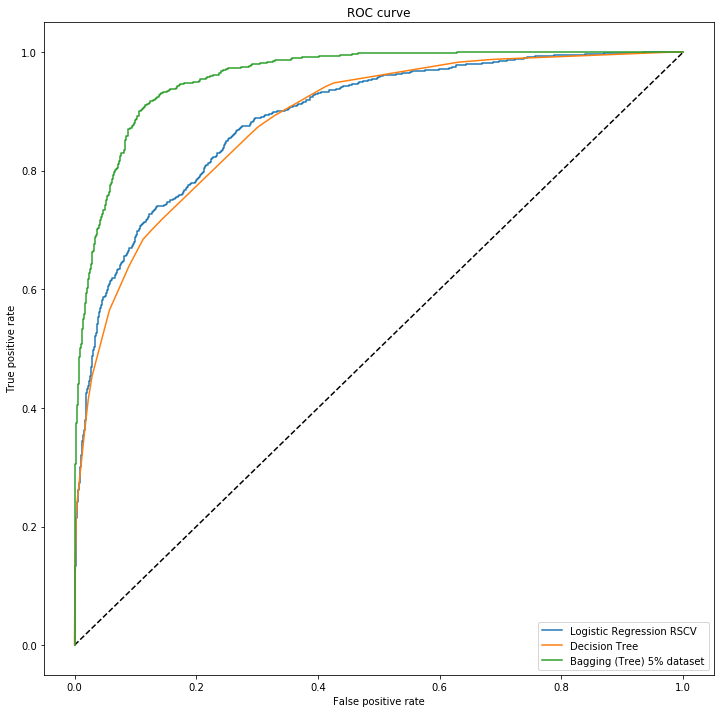

In [47]:
results['Bagging (Tree) 5% dataset'] = y_train_pred_proba_bag_5
plot_roc_curve(results, y_train_5)

Sur notre jeu échantillon de 5%, nous opterons pour le Bagging Tree , pour sa meilleure
performance comme le montre la courbe ROC ci-dessous.
Augmentons graduellement nos données avec le Bagging Tree.

## Entrainement final avec Bagging Tree

### 6% du dataset (5972 observations)

In [48]:
X_train_6 = subset(df_scaled, 0.06)
y_train_6 = subset(y, 0.06)

In [49]:
y_train_6.shape

(5972,)

In [50]:
# Recherche aléatoire avec validation croisée
clf6_bag_rnd = RandomizedSearchCV(clf_bag, distributions, n_iter=100, cv=5, scoring="roc_auc", verbose=1, n_jobs=8, random_state=2020)

In [51]:
clf6_bag_rnd.fit(X_train_6, y_train_6)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   42.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  7.1min
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:  7.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0019415783974619204,
                                                                                     class_weight=None,
                                                                                     criterion='entropy',
                                                                                     max_depth=53,
                                                                                     max_features=None,
                                                                                     max_leaf_nodes=None,
                                                                                     min_impurity_decrease=0.0,
                                                                                     min_impurity_split=None,
                                                                                     min_samples_le

In [52]:
print(f'Meilleurs paramètres: {clf6_bag_rnd.best_params_}')
print(f'Meilleur score (mean CV): {clf6_bag_rnd.best_score_}')

Meilleurs paramètres: {'n_estimators': 96}
Meilleur score (mean CV): 0.865240054450848


#### Aire sous la courbe

In [53]:
y_train_pred_proba_bag_6 = clf6_bag_rnd.best_estimator_.predict_proba(X_train_6)[:,1]
print(f'AUC = {roc_auc_score(y_train_6, y_train_pred_proba_bag_6)}')

AUC = 0.9390329634100816


#### Courbe ROC

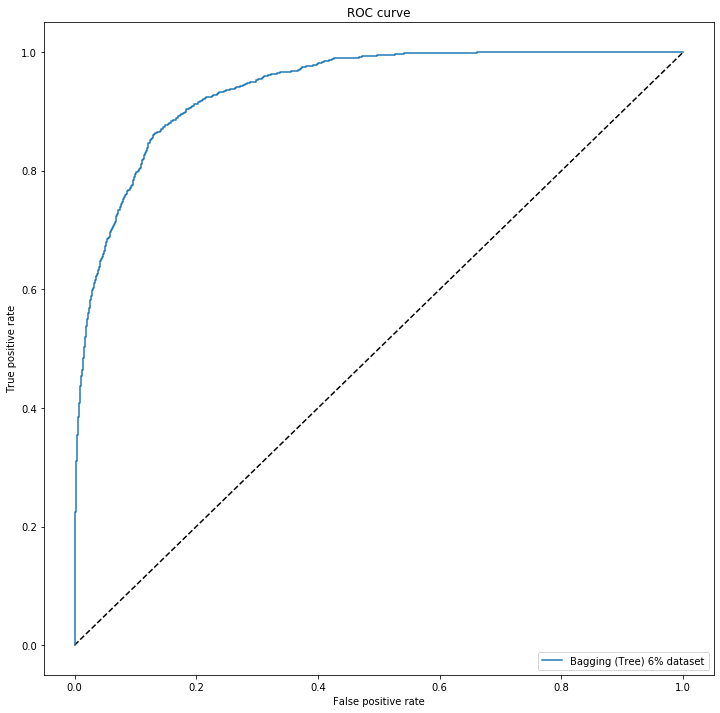

In [54]:
results_6 = {}
results_6['Bagging (Tree) 6% dataset'] = y_train_pred_proba_bag_6
plot_roc_curve(results_6, y_train_6)

### 7% du dataset (6967 observations)

In [55]:
X_train_7 = subset(df_scaled, 0.07)
y_train_7 = subset(y, 0.07)

In [56]:
X_train_7.shape

(6967, 16)

In [57]:
# Recherche aléatoire avec validation croisée
clf7_bag_rnd = RandomizedSearchCV(clf_bag, distributions, n_iter=100, cv=5, scoring="roc_auc", verbose=1, n_jobs=8, random_state=2020)

In [58]:
clf7_bag_rnd.fit(X_train_7, y_train_7)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   50.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  3.7min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  8.7min
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:  9.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0019415783974619204,
                                                                                     class_weight=None,
                                                                                     criterion='entropy',
                                                                                     max_depth=53,
                                                                                     max_features=None,
                                                                                     max_leaf_nodes=None,
                                                                                     min_impurity_decrease=0.0,
                                                                                     min_impurity_split=None,
                                                                                     min_samples_le

In [59]:
print(f'Meilleurs paramètres: {clf7_bag_rnd.best_params_}')
print(f'Meilleur score (mean CV): {clf7_bag_rnd.best_score_}')

Meilleurs paramètres: {'n_estimators': 91}
Meilleur score (mean CV): 0.8816900589566705


#### Aire sous la courbe

In [60]:
y_train_pred_proba_bag_7 = clf7_bag_rnd.best_estimator_.predict_proba(X_train_7)[:,1]
print(f'AUC = {roc_auc_score(y_train_7, y_train_pred_proba_bag_7)}')

AUC = 0.9212810771071793


#### Courbe ROC

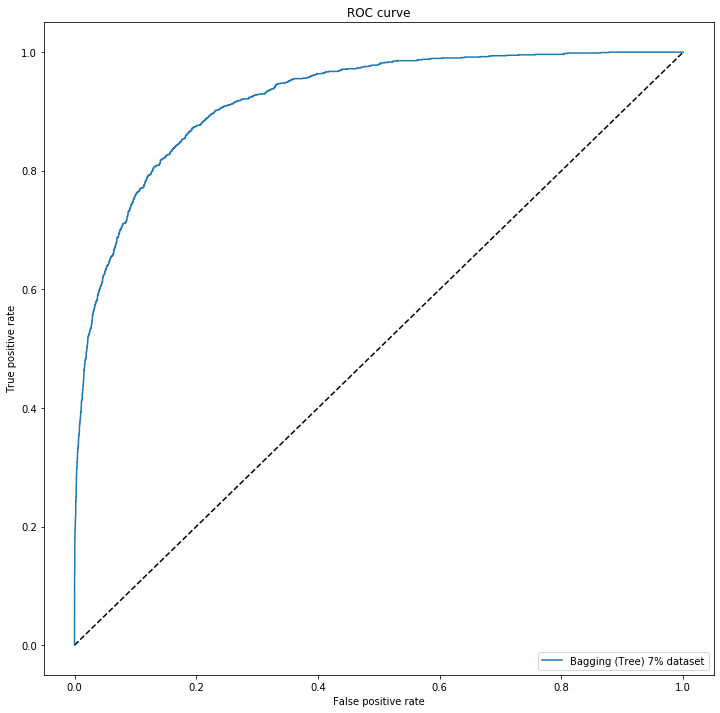

In [61]:
results_7 = {}
results_7['Bagging (Tree) 7% dataset'] = y_train_pred_proba_bag_7
plot_roc_curve(results_7, y_train_7)

### 8% du dataset (7962 observations)

In [62]:
X_train_8 = subset(df_scaled, 0.08)
y_train_8 = subset(y, 0.08)

In [63]:
X_train_8.shape

(7962, 16)

In [64]:
# Recherche aléatoire avec validation croisée
clf8_bag_rnd = RandomizedSearchCV(clf_bag, distributions, n_iter=100, cv=5, scoring="roc_auc", verbose=1, n_jobs=8, random_state=2020)

In [65]:
clf8_bag_rnd.fit(X_train_8, y_train_8)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 10.2min
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed: 11.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0019415783974619204,
                                                                                     class_weight=None,
                                                                                     criterion='entropy',
                                                                                     max_depth=53,
                                                                                     max_features=None,
                                                                                     max_leaf_nodes=None,
                                                                                     min_impurity_decrease=0.0,
                                                                                     min_impurity_split=None,
                                                                                     min_samples_le

In [66]:
print(f'Meilleurs paramètres: {clf8_bag_rnd.best_params_}')
print(f'Meilleur score (mean CV): {clf8_bag_rnd.best_score_}')

Meilleurs paramètres: {'n_estimators': 71}
Meilleur score (mean CV): 0.8648390883297639


#### Aire sous la courbe

In [67]:
y_train_pred_proba_bag_8 = clf8_bag_rnd.best_estimator_.predict_proba(X_train_8)[:,1]
print(f'AUC = {roc_auc_score(y_train_8, y_train_pred_proba_bag_8)}')

AUC = 0.9053376984438856


#### Courbe ROC

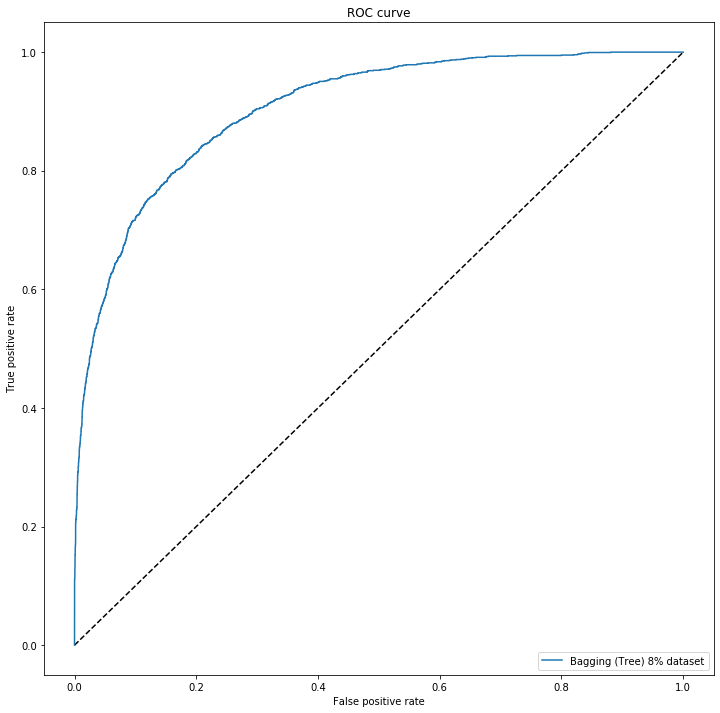

In [68]:
results_8 = {}
results_8['Bagging (Tree) 8% dataset'] = y_train_pred_proba_bag_8
plot_roc_curve(results_8, y_train_8)

### 9% du dataset (8958 observations)

In [69]:
X_train_9 = subset(df_scaled, 0.09)
y_train_9 = subset(y, 0.09)

In [70]:
X_train_9.shape

(8958, 16)

In [71]:
# Recherche aléatoire avec validation croisée
clf9_bag_rnd = RandomizedSearchCV(clf_bag, distributions, n_iter=100, cv=5, scoring="roc_auc", verbose=1, n_jobs=8, random_state=2020)

In [72]:
clf9_bag_rnd.fit(X_train_9, y_train_9)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  5.0min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 11.7min
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed: 13.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0019415783974619204,
                                                                                     class_weight=None,
                                                                                     criterion='entropy',
                                                                                     max_depth=53,
                                                                                     max_features=None,
                                                                                     max_leaf_nodes=None,
                                                                                     min_impurity_decrease=0.0,
                                                                                     min_impurity_split=None,
                                                                                     min_samples_le

In [73]:
print(f'Meilleurs paramètres: {clf9_bag_rnd.best_params_}')
print(f'Meilleur score (mean CV): {clf9_bag_rnd.best_score_}')

Meilleurs paramètres: {'n_estimators': 98}
Meilleur score (mean CV): 0.8746935655343396


#### Aire sous la courbe

In [74]:
y_train_pred_proba_bag_9 = clf9_bag_rnd.best_estimator_.predict_proba(X_train_9)[:,1]
print(f'AUC = {roc_auc_score(y_train_9, y_train_pred_proba_bag_9)}')

AUC = 0.9001711371891589


#### Courbe ROC

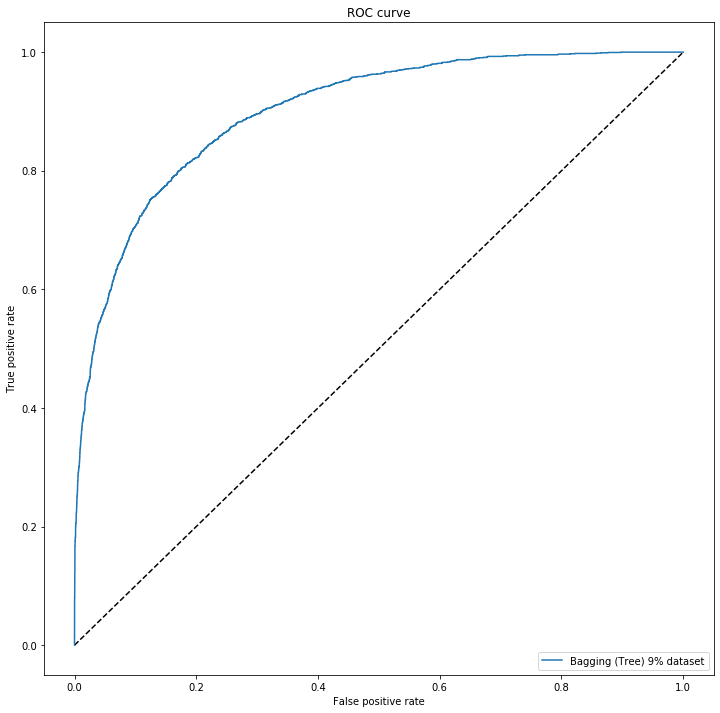

In [75]:
results_9 = {}
results_9['Bagging (Tree) 9% dataset'] = y_train_pred_proba_bag_9
plot_roc_curve(results_9, y_train_9)

**Interpretation:** Après avoir trouvé notre meilleur modèle (Gradient Bossting) sur le jeu échantillon (5%), nous avons réentrainé le Gradient Bossting progressivement sur nos données (6%, 7%, 8%, 9%). Nous constations qu'il y a peu de variance du modèle en analysant le learning curve. Par conséquent nous avons stoppé et utilisé notre meilleur modèle Gradient Boosting trouvé à date.

# 5 - Persistence du meilleur modèle

In [76]:
import pickle

In [77]:
with open('best_model_joel_tp2.pkl', 'wb') as f:
    pickle.dump(best_model_gb, f)

# 6 - Chargement du meilleur modèle

In [78]:
with open('best_model_joel_tp2.pkl', 'rb') as f:
    best_model_gb = pickle.load(f)

# 7 - Prédictions sur le jeu de test

In [79]:
def prepare_data(df):
    """
    Préparation et sélection manuelle des variables explicatives
    """
    
    dfp = pd.DataFrame()
    
    dfp['RainToday'] = (df['RainToday'] == "Yes").astype(int)
    dfp['Temp3pm'] = df['Temp3pm']
    dfp['Temp9am'] = df['Temp9am']
    dfp['Cloud3pm'] = df['Cloud3pm']
    dfp['Cloud9am'] = df['Cloud9am']
    dfp['Pressure3pm'] = df['Pressure3pm']
    dfp['Pressure9am'] = df['Pressure9am']
    dfp['Humidity3pm'] = df['Humidity3pm']
    dfp['Humidity9am'] = df['Humidity9am']
    dfp['WindSpeed3pm'] = df['WindSpeed3pm']
    dfp['WindGustSpeed'] = df['WindGustSpeed']
    dfp['Sunshine'] = df['Sunshine']
    dfp['Evaporation'] = df['Evaporation']
    dfp['Rainfall'] = df['Rainfall']
    dfp['MaxTemp'] = df['MaxTemp']
    dfp['MinTemp'] = df['MinTemp']
   
            
    assert dfp.columns.all(df.columns)
    
    return dfp

In [80]:
AUS_test = pd.read_csv('AUS_test.csv', index_col=[0])

In [81]:
AUS_test.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
8,2008-12-09,Albury,9.7,31.9,0.0,4.8,8.5,NNW,80.0,SE,...,28.0,42.0,9.0,1008.9,1003.6,5.0,5.0,18.3,30.2,No
14,2008-12-16,Albury,9.8,27.7,0.0,4.8,8.5,WNW,50.0,N,...,22.0,50.0,28.0,1013.4,1010.3,0.0,5.0,17.3,26.2,No
18,2008-12-20,Albury,9.8,25.6,0.0,4.8,8.5,SSE,26.0,SE,...,6.0,45.0,26.0,1019.2,1017.1,5.0,5.0,15.8,23.2,No


In [82]:
AUS_test.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [83]:
df_test = prepare_data(AUS_test)

In [84]:
df_test.head()

,RainToday,Temp3pm,Temp9am,Cloud3pm,Cloud9am,Pressure3pm,Pressure9am,Humidity3pm,Humidity9am,WindSpeed3pm,WindGustSpeed,Sunshine,Evaporation,Rainfall,MaxTemp,MinTemp
1,0,24.3,17.2,5.0,5.0,1007.8,1010.6,25.0,44.0,22.0,44.0,8.5,4.8,0.0,25.1,7.4
4,0,29.7,17.8,8.0,7.0,1006.0,1010.8,33.0,82.0,20.0,41.0,8.5,4.8,1.0,32.3,17.5
8,0,30.2,18.3,5.0,5.0,1003.6,1008.9,9.0,42.0,28.0,80.0,8.5,4.8,0.0,31.9,9.7
14,0,26.2,17.3,5.0,0.0,1010.3,1013.4,28.0,50.0,22.0,50.0,8.5,4.8,0.0,27.7,9.8
18,0,23.2,15.8,5.0,5.0,1017.1,1019.2,26.0,45.0,6.0,26.0,8.5,4.8,0.0,25.6,9.8


In [85]:
#standardisation
scaler.fit(df_test)
df_test_scaled = scaler.transform(df_test)

In [86]:
X_test = df_test_scaled
y_pred_test = best_model_gb.predict_proba(X_test)

In [87]:
AUS_test['y_pred_test'] = y_pred_test[:,1]

In [88]:
AUS_test.to_csv('output.csv', columns=['y_pred_test'])

**FIN**